In [11]:
from 

ValueError: r_home is None. Try python -m rpy2.situation

In [2]:
ff = importr("fasano.franceschini.test")

In [4]:
def ff_test(S1, S2, **kwargs):
    with (ro.default_converter + pandas2ri.converter).context():
        result = dict(ff.fasano_franceschini_test(S1, S2))
                      
    return result

In [29]:
import pandas as pd
import numpy as np
from dataclasses import dataclass

from surp.src.analysis.vice_model import vice_model
import surp.src.analysis.apogee_analysis as aah
from surp.src.analysis.apogee_analysis import subgiants

import arya
import matplotlib.pyplot as plt

In [18]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""


def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../output/" + name + ".json"
    return vice_model(file_name)


fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0",
    beta="0.4", version="_v0.1.4"))

In [23]:
stars = fiducial.stars["apogee"]

In [26]:
s1 = pd.DataFrame({
    "x": subgiants["MG_H"],
    "y": subgiants["C_MG"]
})

s2 = pd.DataFrame({
    "x": stars["[o/h]"],
    "y": stars["[c/o]"]
})
s1

,x,y
0,-0.176264,-0.181092
1,0.533275,-0.128050
2,0.301142,0.030329
3,0.154887,-0.087583
4,0.099637,-0.138952
...,...,...
16391,0.067715,-0.022974
16392,-0.480111,-0.110429
16393,0.193917,-0.096821
16394,0.127543,-0.148282


In [27]:
ff_test(s1, s2)

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: |----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: 

{'statistic': array([67.05460796]),
 'p.value': array([0.30693069]),
 'conf.int': array([0.21897873, 0.40655677]),
 'estimate': array([0.90249513, 0.89916162]),
 'method': <rpy2.robjects.vectors.StrVector object at 0x7f6f2ee5da00> [RTYPES.STRSXP]
 R classes: ('character',)
 ['Fasano-Francheschini Test'],
 'data.name': <rpy2.robjects.vectors.StrVector object at 0x7f6f2eed5ec0> [RTYPES.STRSXP]
 R classes: ('character',)
 ['structur..., '0.154886..., '-0.09526..., '-0.13389..., ..., '"16371",..., '"16378",..., '"16385",..., '"16392",...]}

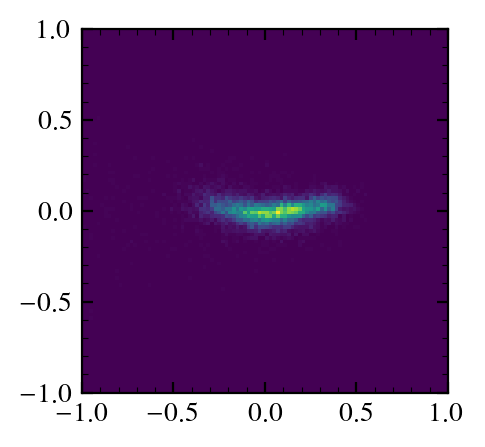

In [87]:
subgiants = subgiants[~subgiants["high_alpha"]]

counts, xbins, ybins, f = plt.hist2d(subgiants["MG_H"], subgiants["C_FE"], range=((-1, 1), (-1,1)), bins=100)

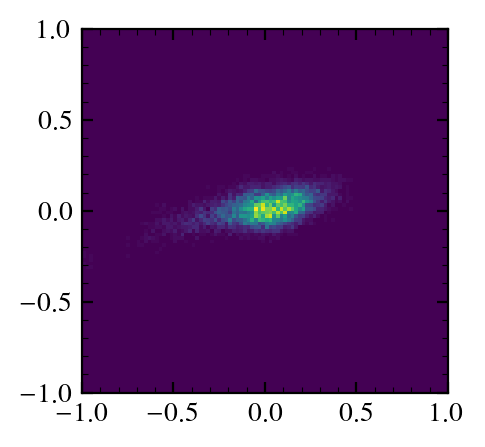

In [88]:
counts2, xbins, ybins, f = plt.hist2d(stars["[o/h]"]+np.random.normal(0, 0.03, len(stars)), stars["[c/fe]"]+np.random.normal(0, 0.04, len(stars)), range=((-1, 1), (-1,1)), bins=100)

In [89]:
s1 = np.sum(counts)
s2 = np.sum(counts2)

In [90]:
d1 = counts/s1
d2 = counts2/s2
e1 = np.sqrt(counts)/s1
e2 = np.sqrt(counts2)/s2
e = np.sqrt(e1**2 + e2**2)

In [91]:
np.sum(((d1-d2)**2/e**2)[e>0])/(np.sum((d1+d2+e)>0))

/tmp/ipykernel_20646/1319365134.py:1: RuntimeWarning: invalid value encountered in divide
  np.sum(((d1-d2)**2/e**2)[e>0])/(np.sum((d1+d2+e)>0))


3.606076319271825

/tmp/ipykernel_20646/792191024.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow((((d1-d2)/e).transpose()), extent=(-1,1,1,-1), cmap="RdBu")


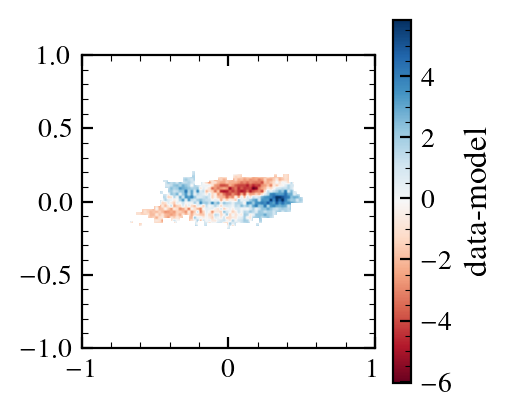

In [92]:
plt.imshow((((d1-d2)/e).transpose()), extent=(-1,1,1,-1), cmap="RdBu")
plt.colorbar(label="data-model")

plt.gca().invert_yaxis()